## PART 1

In [1]:
import re

In [2]:
string = '{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'
print('INPUT: \n',string,'\n')
print('OUTPUT: \n',re.findall(r':(\d+)', string))

INPUT: 
 {"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]} 

OUTPUT: 
 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '648', '649', '650', '651', '652', '653', '3']


## PART 2

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### EDA

In [4]:
# reading the training file
df = pd.read_csv('C:/Users/win10/Downloads/train_data_evaluation_part_2.csv')

# dropping unnecessary columns
df.drop(columns = ['Unnamed: 0', 'ID'], inplace=True, axis=1)

# rearranging columns to keep target variable 'BookingsCheckedIn' at the end
df = df[['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn']]

# dropping duplicate rows and resetting the index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# show info and top 5 rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80226 entries, 0 to 80225
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           80226 non-null  object 
 1   Age                   77136 non-null  float64
 2   DaysSinceCreation     80226 non-null  int64  
 3   AverageLeadTime       80226 non-null  int64  
 4   LodgingRevenue        80226 non-null  float64
 5   OtherRevenue          80226 non-null  float64
 6   PersonsNights         80226 non-null  int64  
 7   RoomNights            80226 non-null  int64  
 8   DaysSinceLastStay     80226 non-null  int64  
 9   DaysSinceFirstStay    80226 non-null  int64  
 10  DistributionChannel   80226 non-null  object 
 11  MarketSegment         80226 non-null  object 
 12  SRHighFloor           80226 non-null  int64  
 13  SRLowFloor            80226 non-null  int64  
 14  SRAccessibleRoom      80226 non-null  int64  
 15  SRMediumFloor      

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn
0,PRT,51.0,150,45,371.0,105.3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3
1,PRT,NaN,1095,61,280.0,53.0,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,DEU,31.0,1095,0,0.0,0.0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,FRA,51.0,1095,0,0.0,0.0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


"Age" column having 3.85 % missing values to be imputed. 



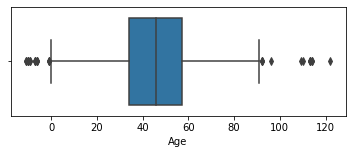

In [11]:
# Column with missing/null values

print('"Age" column having',round(len(df[df['Age'].isnull()==True])/len(df['Age'])*100,2), '% missing values to be imputed. \n')

plt.figure(figsize =(6, 2))
sns.boxplot(x=df['Age'])
plt.show()

In [6]:
# Imputing age column with median

df['Age'].fillna(int(df['Age'].median()), inplace=True)

In [7]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn
count,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000
mean,45.422270,460.279373,65.985067,305.667105,68.979395,4.744173,2.403547,408.870254,411.247264,0.048401,0.001471,0.000262,0.000910,0.002892,0.001782,0.013038,0.356580,0.138646,0.000312,0.003652,0.000125,0.090071,0.002107,0.000661,0.806484
std,16.125791,311.084220,86.351514,376.210900,115.603841,4.586116,2.294074,345.543216,346.291763,0.214613,0.038324,0.016177,0.030151,0.053698,0.042182,0.113439,0.478992,0.345579,0.017650,0.060323,0.011164,0.286285,0.068154,0.030158,0.700146
min,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,183.000000,0.000000,74.000000,4.000000,1.000000,1.000000,52.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,46.000000,409.000000,30.000000,237.600000,41.000000,4.000000,2.000000,389.000000,392.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,728.000000,103.000000,411.000000,89.000000,8.000000,4.000000,703.000000,709.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,116.000000,185.000000,1104.000000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,3.000000,66.000000


#### Target Variable

1     60512
0     18268
2      1138
3       132
4        59
5        20
6        20
7        16
8        10
9         9
10        7
11        6
12        4
13        4
29        3
15        3
23        2
14        2
25        1
17        1
66        1
26        1
57        1
40        1
18        1
24        1
19        1
20        1
34        1
Name: BookingsCheckedIn, dtype: int64


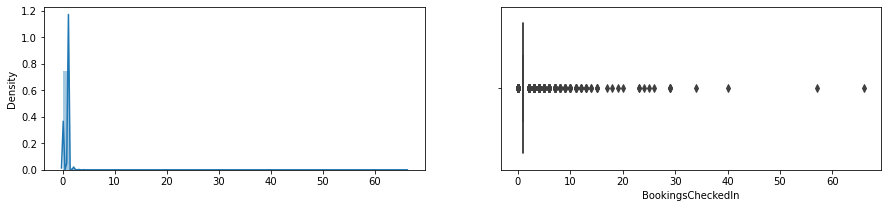

In [8]:
# Data distribution in Target variable

print(df['BookingsCheckedIn'].value_counts())

fig, axes = plt.subplots(1, 2, figsize=(15, 3))
sns.distplot(ax=axes[0], x=df['BookingsCheckedIn'])
sns.boxplot(ax=axes[1], x=df['BookingsCheckedIn'])
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Target data variable is extremely skewed with a trail of outliers. It can be imputed by category '1' 
</div>

In [9]:
q1 = df['BookingsCheckedIn'].quantile([0.05])[.05]
q2 = df['BookingsCheckedIn'].quantile([0.95])[.95]

before = len(df)

after = len(df[(df['BookingsCheckedIn']==q1)|(df['BookingsCheckedIn']==q2)])

# imputing outliers with category '1'
df['BookingsCheckedIn'][(df['BookingsCheckedIn']>1)] = 1

outliers_imputed = round((before - after)/before*100,2)

print('"BookingsCheckedIn" column having',outliers_imputed, '% outliers data has been imputed by category "1".\n')

"BookingsCheckedIn" column having 1.8 % outliers data has been imputed by category "1".



1    61958
0    18268
Name: BookingsCheckedIn, dtype: int64


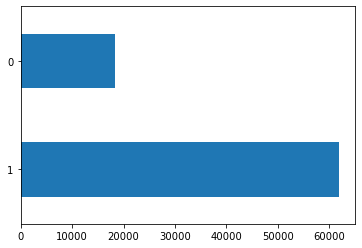

In [10]:
# Data distribution in Target variable after treating outliers

print(df['BookingsCheckedIn'].value_counts())
df['BookingsCheckedIn'].value_counts().plot.barh()
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Target data variable is fairly imbalanced here. 
</div>

In [11]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn
count,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000,80226.000000
mean,45.422270,460.279373,65.985067,305.667105,68.979395,4.744173,2.403547,408.870254,411.247264,0.048401,0.001471,0.000262,0.000910,0.002892,0.001782,0.013038,0.356580,0.138646,0.000312,0.003652,0.000125,0.090071,0.002107,0.000661,0.772293
std,16.125791,311.084220,86.351514,376.210900,115.603841,4.586116,2.294074,345.543216,346.291763,0.214613,0.038324,0.016177,0.030151,0.053698,0.042182,0.113439,0.478992,0.345579,0.017650,0.060323,0.011164,0.286285,0.068154,0.030158,0.419355
min,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,183.000000,0.000000,74.000000,4.000000,1.000000,1.000000,52.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,46.000000,409.000000,30.000000,237.600000,41.000000,4.000000,2.000000,389.000000,392.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,56.000000,728.000000,103.000000,411.000000,89.000000,8.000000,4.000000,703.000000,709.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,116.000000,185.000000,1104.000000,1186.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,3.000000,1.000000


### Numerical Feature Variables

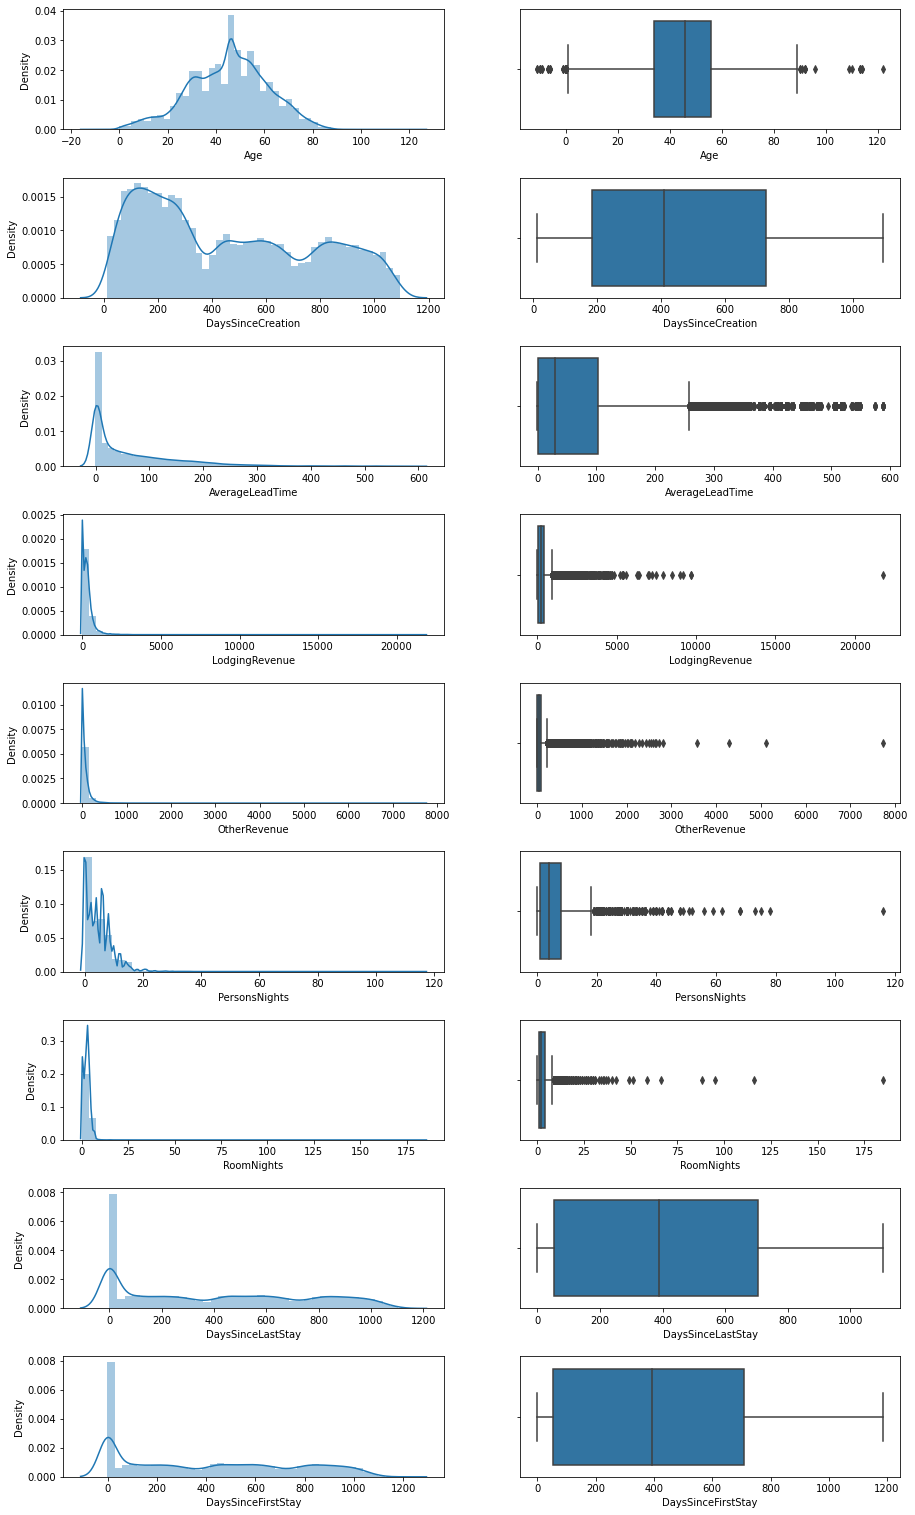

In [12]:
# Data distribution plot for all numeric feature columns

cols = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 
        'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay']

fig, axes = plt.subplots(len(cols), 2, figsize=(15, 3*len(cols)))

for index, column in enumerate(cols):    
    sns.distplot(ax=axes[index][0], x=df[column])
    axes[index][0].set_xlabel(column)
    sns.boxplot(ax=axes[index][1], x=df[column])
    axes[index][1].set_xlabel(column)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Following columns have shown high no. of outliers:
    <li> Age ==> 1.69 %</li> 
    <li> AverageLeadTime ==> 0.96 %</li> 
    <li> LodgingRevenue ==> 1.0 %</li> 
    <li> OtherRevenue ==> 1.0 %</li> 
    <li> PersonsNights ==> 0.94 %</li> 
    <li> RoomNights ==> 0.81 %</li> 
    
  We can drop rows that share outliers among these columns. 
</div>

In [13]:
before = len(df)

q1 = df['Age'].quantile([00.01])[0.01]
q2 = df['Age'].quantile([00.99])[0.99]

df1 = df[(df['Age']>=q1)&(df['Age']<=q2)]

q1 = df['AverageLeadTime'].quantile([00.01])[0.01]
q2 = df['AverageLeadTime'].quantile([00.99])[0.99]

df2 = df[(df['AverageLeadTime']>=q1)&(df['AverageLeadTime']<=q2)]

q1 = df['LodgingRevenue'].quantile([00.01])[0.01]
q2 = df['LodgingRevenue'].quantile([00.99])[0.99]

df3 = df[(df['LodgingRevenue']>=q1)&(df['LodgingRevenue']<=q2)]

q1 = df['OtherRevenue'].quantile([00.01])[0.01]
q2 = df['OtherRevenue'].quantile([00.99])[0.99]

df4 = df[(df['OtherRevenue']>=q1)&(df['OtherRevenue']<=q2)]

q1 = df['PersonsNights'].quantile([00.01])[0.01]
q2 = df['PersonsNights'].quantile([00.99])[0.99]

df5 = df[(df['PersonsNights']>=q1)&(df['PersonsNights']<=q2)]

q1 = df['RoomNights'].quantile([00.01])[0.01]
q2 = df['RoomNights'].quantile([00.99])[0.99]

df6 = df[(df['RoomNights']>=q1)&(df['RoomNights']<=q2)]

print('Age ==>',round((len(df)-len(df1))/len(df)*100,2),'%')
print('AverageLeadTime ==>',round((len(df)-len(df2))/len(df)*100,2),'%')
print('LodgingRevenue ==>',round((len(df)-len(df3))/len(df)*100,2),'%')
print('OtherRevenue ==>',round((len(df)-len(df4))/len(df)*100,2),'%')
print('PersonsNights ==>',round((len(df)-len(df5))/len(df)*100,2),'%')
print('RoomNights ==>',round((len(df)-len(df6))/len(df)*100,2),'%')


# Selecting common useful row indices without outliers
s1 = set(list(df1.index))
s2 = set(list(df2.index))
s3 = set(list(df3.index))
s4 = set(list(df4.index))
s5 = set(list(df5.index))
s6 = set(list(df6.index))

# removing about 14% of data with outliers

useful_rows = list(s1.intersection(s2).intersection(s3).intersection(s4).intersection(s5).intersection(s6))
df = df.iloc[useful_rows]
df.reset_index(drop=True, inplace=True)
after = len(df)
perc = round((before-after)/before*100,2)

print('\nCommon {} rows with outliers approx. {}% dropped out of {} rows, \nNew total num. of rows = {}'.format(before - after, perc, before, after))

Age ==> 1.69 %
AverageLeadTime ==> 0.96 %
LodgingRevenue ==> 1.0 %
OtherRevenue ==> 1.0 %
PersonsNights ==> 0.94 %
RoomNights ==> 0.81 %

Common 4295 rows with outliers approx. 5.35% dropped out of 80226 rows, 
New total num. of rows = 75931


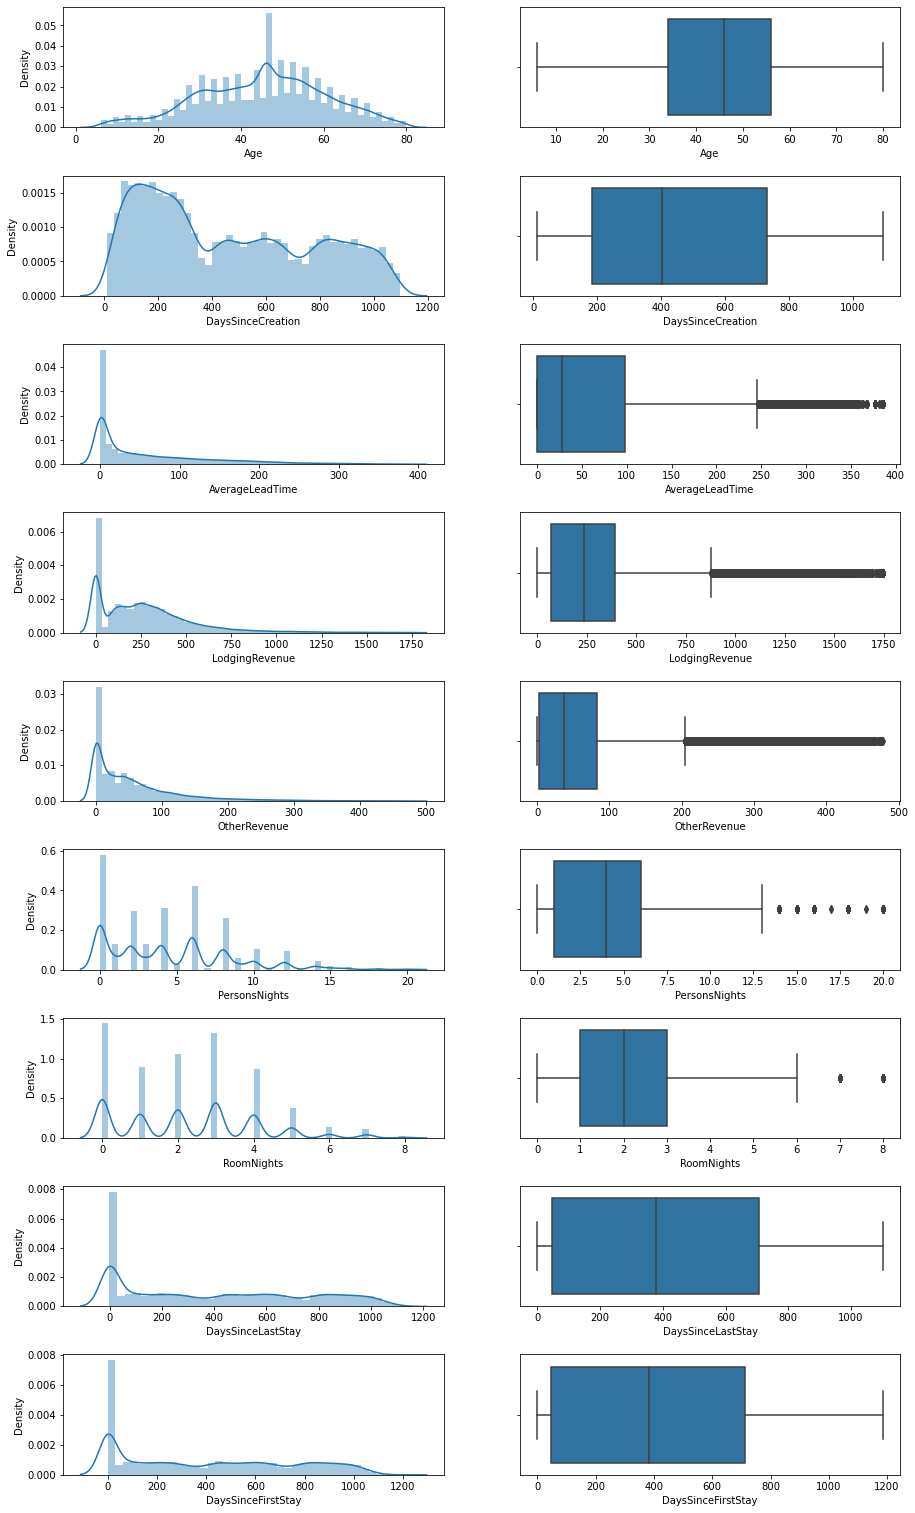

In [14]:
# Data distribution plot for all numeric feature columns after dropping outliers

cols = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'PersonsNights', 
        'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay']

fig, axes = plt.subplots(len(cols), 2, figsize=(15, 3*len(cols)))

for index, column in enumerate(cols):    
    sns.distplot(ax=axes[index][0], x=df[column])
    axes[index][0].set_xlabel(column)
    sns.boxplot(ax=axes[index][1], x=df[column])
    axes[index][1].set_xlabel(column)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> As we can see we have removed outliers to a great extent. 
</div>

### Bivariate Analysis

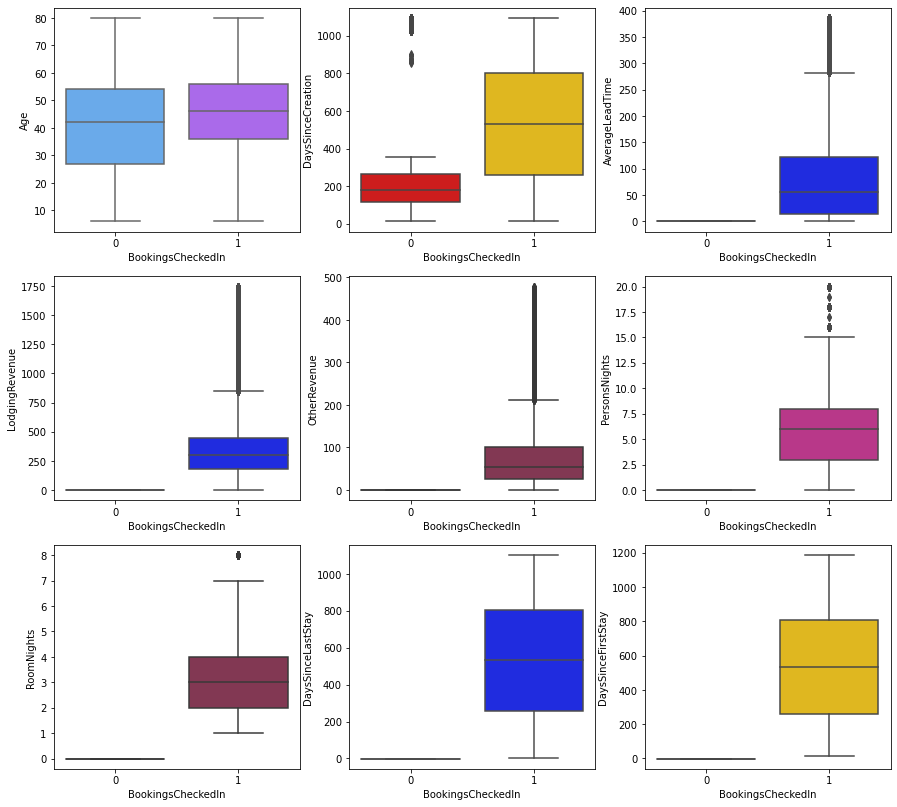

In [15]:
plt.figure(figsize=(15, 14))
plt.subplot(3,3,1)
sns.boxplot(x = 'BookingsCheckedIn', y = 'Age', data = df, palette='cool')
plt.subplot(3,3,2)
sns.boxplot(x = 'BookingsCheckedIn', y = 'DaysSinceCreation', data = df, palette='hot')
plt.subplot(3,3,3)
sns.boxplot(x = 'BookingsCheckedIn', y = 'AverageLeadTime', data = df, palette='hsv')
plt.subplot(3,3,4)
sns.boxplot(x = 'BookingsCheckedIn', y = 'LodgingRevenue', data = df, palette='hsv')
plt.subplot(3,3,5)
sns.boxplot(x = 'BookingsCheckedIn', y = 'OtherRevenue', data = df, palette='twilight')
plt.subplot(3,3,6)
sns.boxplot(x = 'BookingsCheckedIn', y = 'PersonsNights', data = df, palette='RdPu')
plt.subplot(3,3,7)
sns.boxplot(x = 'BookingsCheckedIn', y = 'RoomNights', data = df, palette='twilight')
plt.subplot(3,3,8)
sns.boxplot(x = 'BookingsCheckedIn', y = 'DaysSinceLastStay', data = df, palette='hsv')
plt.subplot(3,3,9)
sns.boxplot(x = 'BookingsCheckedIn', y = 'DaysSinceFirstStay', data = df, palette='hot')
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Except columns 'Age' and 'DaysSinceCreation', in all the above numeric columns across two classes, only one category in each is dominating here which shows there's no much variance added to the training dataset by these columns.
</div>

### Categorical Feature Variables

In [16]:
df.describe(include = 'object')

,Nationality,DistributionChannel,MarketSegment
count,75931,75931,75931
unique,184,4,7
top,FRA,Travel Agent/Operator,Other
freq,11448,62163,44817


In [17]:
# dropping 'Nationality' column as it is unnecessary

df.drop('Nationality', axis=1, inplace=True)

In [18]:
df['DistributionChannel'].value_counts()

Travel Agent/Operator      62163
Direct                     10933
Corporate                   2337
Electronic Distribution      498
Name: DistributionChannel, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> Since only 1 category is dominationg here, we can easily put them into 2 classes of 0s & 1s to convert it into dummy alternative. 
</div>

In [19]:
def convert_to_dummy(category):
    return 1 if category == 'Travel Agent/Operator' else 0

df['DistributionChannel_TravelAgent'] = df.apply(lambda x: convert_to_dummy(x.DistributionChannel), axis=1)
df.drop('DistributionChannel', axis=1, inplace=True)

In [20]:
df['MarketSegment'].value_counts()

Other                    44817
Direct                   10525
Travel Agent/Operator    10245
Groups                    7740
Corporate                 1946
Complementary              454
Aviation                   204
Name: MarketSegment, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> Since only 1 category is dominationg here, we can easily put them into 2 classes of 0s & 1s to convert it into dummy alternative. 
</div>

In [21]:
def convert_to_dummy(category):
    return 1 if category == 'Other' else 0

df['MarketSegment_Other'] = df.apply(lambda x: convert_to_dummy(x.MarketSegment), axis=1)
df.drop('MarketSegment', axis=1, inplace=True)

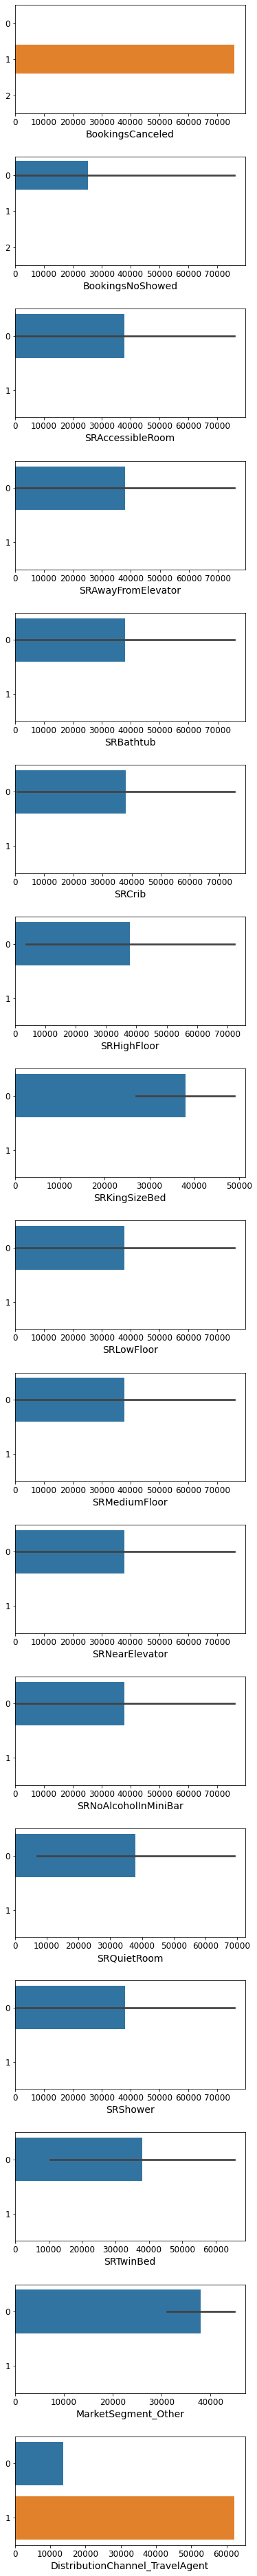

In [22]:
cols = ['BookingsCanceled','BookingsNoShowed','SRAccessibleRoom', 'SRAwayFromElevator','SRBathtub','SRCrib',
        'SRHighFloor','SRKingSizeBed','SRLowFloor','SRMediumFloor', 'SRNearElevator','SRNoAlcoholInMiniBar',
        'SRQuietRoom','SRShower','SRTwinBed', 'MarketSegment_Other', 'DistributionChannel_TravelAgent']

fig, axes = plt.subplots(len(cols), 1, figsize=(6, 4*len(cols)))

for index, column in enumerate(cols):    
    sns.barplot(ax=axes[index], x=df[column].value_counts(), y=column, data=df, orient='h')
    axes[index].set_xlabel(column,fontsize=14)
    axes[index].set_ylabel("")
    axes[index].tick_params(labelsize=12)
    
plt.subplots_adjust(hspace=0.4)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> In all the above categorical columns only one category in each is dominating here. This shows there's no variance or information gained from these columns.
</div>

In [23]:
df = df[['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'BookingsCanceled',
       'BookingsNoShowed', 'DistributionChannel_TravelAgent', 
       'MarketSegment_Other', 'BookingsCheckedIn']]
correlation = df.corr().round(2)

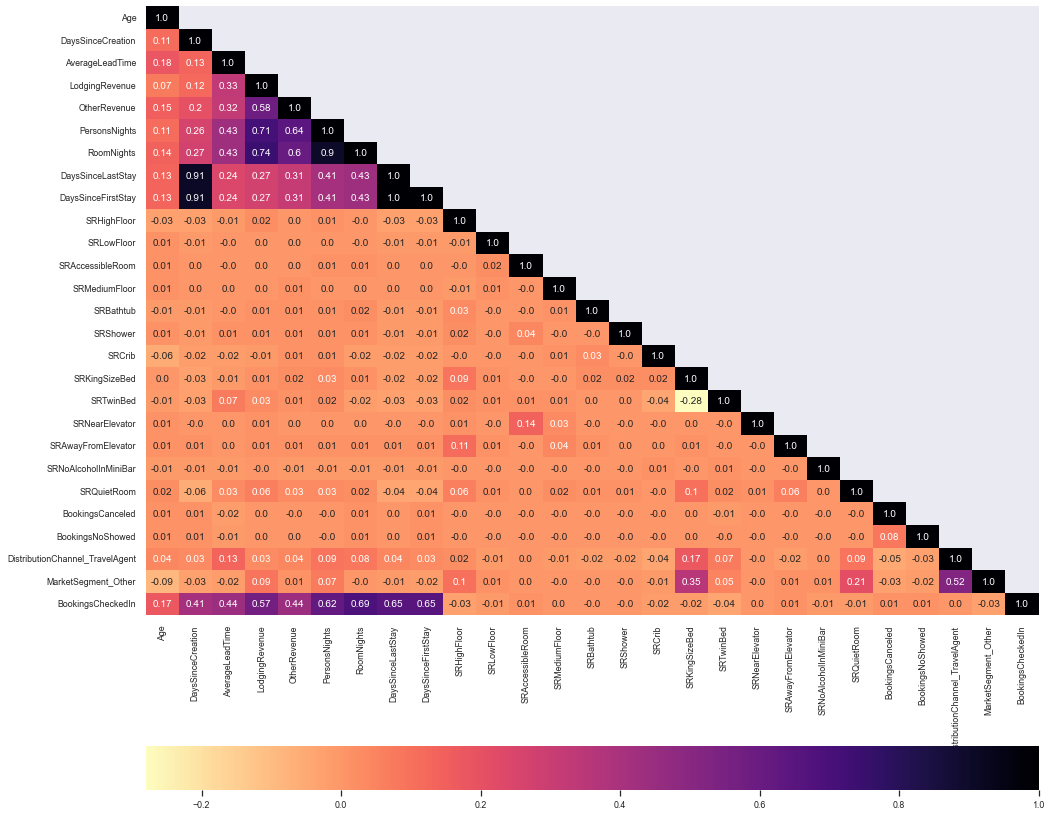

In [24]:
plt.figure(figsize=(16,16)) 
plt.rcParams['font.size'] = 15
sns.set(font_scale=0.8)

mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask), k=1)] = True
sns.heatmap(correlation, annot=True, cmap='magma_r', annot_kws={"size": 10}, fmt=".2",  mask = mask, 
            cbar_kws = dict(use_gridspec=False,location="bottom"),
            xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))
#plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> From the above correlation matrix one can observe at the bottom-most row, that only few following columns are showing some relationship with target variable:
        <li> Age ==> 0.17 </li>
        <li> DaysSinceCreation ==> 0.41 </li>
        <li> AverageLeadTime ==> 0.44 </li>
        <li> LodgingRevenue ==> 0.57 </li>
        <li> OtherRevenue ==> 0.44 </li>
        <li> PersonsNights ==> 0.62 </li>
        <li> RoomNights ==> 0.69 </li>
        <li> DaysSinceLastStay ==> 0.65 </li>
        <li> DaysSinceFirstStay ==> 0.65 </li>
    
 Let us get deeper into the correlation matrix.
</div>

In [25]:
df = df[['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'BookingsCheckedIn']]
correlation = df.corr().round(2)

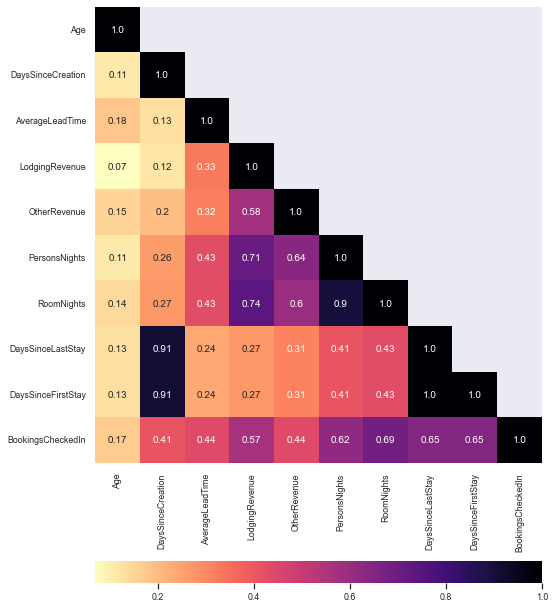

In [26]:
plt.figure(figsize=(8,12)) 
plt.rcParams['font.size'] = 15
sns.set(font_scale=0.8)

mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask), k=1)] = True
sns.heatmap(correlation, annot=True, cmap='magma_r', annot_kws={"size": 10}, fmt=".2",  mask = mask, 
            cbar_kws = dict(use_gridspec=False,location="bottom"),
            xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))
#plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> 'DaysSinceCreation', 'DaysSinceLastStay' & 'DaysSinceFirstStay' are highly correlated, so here we can drop first two columns.
</div>

In [27]:
df = df[['Age', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'PersonsNights', 'RoomNights', 'BookingsCheckedIn']]
correlation = df.corr().round(2)

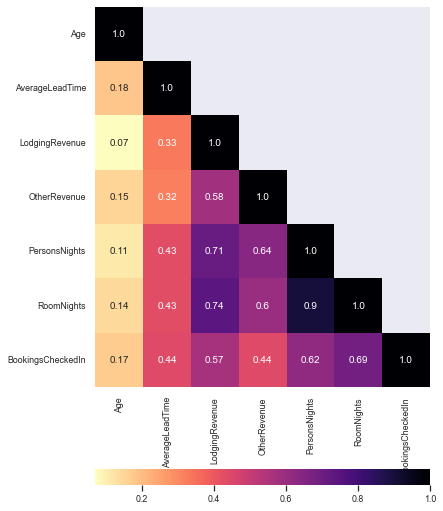

In [28]:
plt.figure(figsize=(6,10)) 
plt.rcParams['font.size'] = 15
sns.set(font_scale=0.8)

mask = np.zeros(correlation.shape, dtype=bool)
mask[np.triu_indices(len(mask), k=1)] = True
sns.heatmap(correlation, annot=True, cmap='magma_r', annot_kws={"size": 10}, fmt=".2",  mask = mask, 
            cbar_kws = dict(use_gridspec=False,location="bottom"),
            xticklabels=list(correlation.columns.values), yticklabels=list(correlation.columns.values))
#plt.xticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> We can now use these set of features to train our neural network.
</div>

1    58343
0    17588
Name: BookingsCheckedIn, dtype: int64


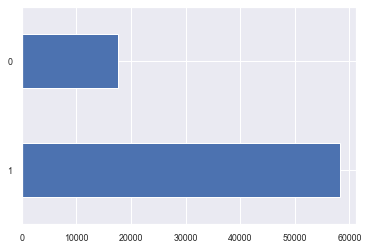

In [29]:
print(df['BookingsCheckedIn'].value_counts())
df['BookingsCheckedIn'].value_counts().plot.barh()
plt.show()

### Downsampling category '1' in target variable

In [30]:
df0 = df[df['BookingsCheckedIn']==0]
df1 = df[df['BookingsCheckedIn']==1].sample(n = len(df0))

df = df0.append(df1, ignore_index=True).sample(frac=1).reset_index(drop=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35176 entries, 0 to 35175
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                35176 non-null  float64
 1   AverageLeadTime    35176 non-null  int64  
 2   LodgingRevenue     35176 non-null  float64
 3   OtherRevenue       35176 non-null  float64
 4   PersonsNights      35176 non-null  int64  
 5   RoomNights         35176 non-null  int64  
 6   BookingsCheckedIn  35176 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.9 MB


,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,BookingsCheckedIn
0,30.0,0,0.0,0.0,0,0,0
1,56.0,0,0.0,0.0,0,0,0
2,31.0,0,0.0,0.0,0,0,0
3,44.0,70,468.9,85.5,12,3,1
4,59.0,46,477.0,6.0,2,1,1


0    17588
1    17588
Name: BookingsCheckedIn, dtype: int64


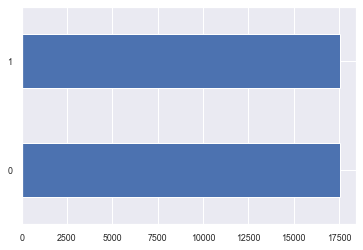

In [31]:
print(df['BookingsCheckedIn'].value_counts())
df['BookingsCheckedIn'].value_counts().plot.barh()
plt.show()

### Model training and evaluation

In [32]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

In [33]:
# feature variables
X_train = df.drop(['BookingsCheckedIn'], axis=1)

# target variable
Y_train = df['BookingsCheckedIn']

In [34]:
# reading the training file
df_test = pd.read_csv('C:/Users/win10/Downloads/test_data_evaluation_part2.csv')

df_test = df_test[['Age', 'AverageLeadTime', 'LodgingRevenue',
                   'OtherRevenue', 'PersonsNights', 'RoomNights', 'BookingsCheckedIn']]

# Imputing age column with median
df_test['Age'].fillna(int(df_test['Age'].median()), inplace=True)

# imputing outliers with category '1'
df_test['BookingsCheckedIn'][(df_test['BookingsCheckedIn']>1)] = 1

df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1000 non-null   float64
 1   AverageLeadTime    1000 non-null   int64  
 2   LodgingRevenue     1000 non-null   float64
 3   OtherRevenue       1000 non-null   float64
 4   PersonsNights      1000 non-null   int64  
 5   RoomNights         1000 non-null   int64  
 6   BookingsCheckedIn  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,PersonsNights,RoomNights,BookingsCheckedIn
0,47.0,0,0.00,0.0,0,0,0
1,16.0,130,483.48,155.1,15,5,1
2,15.0,0,0.00,0.0,0,0,0
3,12.0,0,0.00,0.0,0,0,0
4,42.0,0,0.00,0.0,0,0,0


In [35]:
# feature variables
X_test = df_test.drop(['BookingsCheckedIn'], axis=1)

# target variable
Y_test = df_test['BookingsCheckedIn']

In [36]:
# Building neural network

model = Sequential() 
model.add(Dense(60, input_dim=6, activation='relu')) # 6 feature, 60 neurons, relu activation function
model.add(Dense(100, activation='relu'))             # 100 neurons, relu activation function
model.add(Dense(1, activation='sigmoid'))            # binary classification 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                420       
                                                                 
 dense_1 (Dense)             (None, 100)               6100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 6,621
Trainable params: 6,621
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train, Y_train, epochs=10, batch_size=100)

Epoch 1/10
352/352 [==============================] - 2s 4ms/step - loss: 0.0448 - accuracy: 0.9920
Epoch 2/10
352/352 [==============================] - 1s 4ms/step - loss: 0.0083 - accuracy: 0.9989
Epoch 3/10
352/352 [==============================] - 1s 4ms/step - loss: 0.0031 - accuracy: 0.9995
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 5/10
352/352 [==============================] - 2s 4ms/step - loss: 8.2245e-04 - accuracy: 0.9998
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 6.1346e-04 - accuracy: 0.9998
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 3.3219e-04 - accuracy: 0.9999
Epoch 8/10
352/352 [==============================] - 2s 4ms/step - loss: 1.6719e-04 - accuracy: 1.0000
Epoch 9/10
352/352 [==============================] - 2s 4ms/step - loss: 1.2147e-04 - accuracy: 1.0000
Epoch 10/10
352/352 [==============================] - 2s 4ms/step - loss: 8.641

In [38]:
predictions = model.predict(X_test)
Y_pred = [int(round(x[0])) for x in predictions]

32/32 [==============================] - 0s 3ms/step


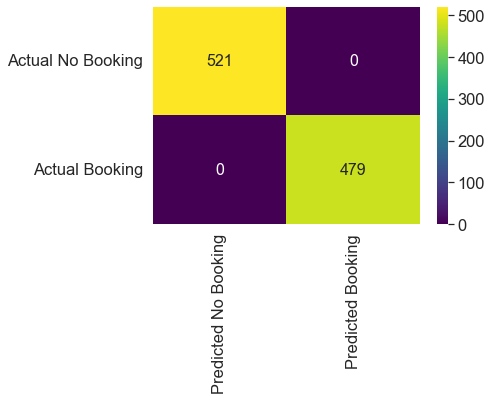

In [39]:
# confusion matrix for test set
test_confusion = confusion_matrix(Y_test, Y_pred)

plt.rcParams['font.size'] = 20
sns.set(font_scale=1.5)
sns.heatmap(test_confusion, annot=True, fmt='g', annot_kws={"size": 16}, cmap='viridis',
            xticklabels=["Predicted No Booking", "Predicted Booking"], 
            yticklabels=["Actual No Booking", "Actual Booking"])
plt.show()